In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df_final = pd.read_csv('encoded_css_data.csv')
# Drop the 'selector' column if it's not needed for prediction
df_final.drop(columns=['selector'],inplace=True)
df_final.head()

,padding,font-size,"font-family_""sans-serif""",color_ #ffdf00,color_ #ffffff,color_ red,color_#000000
0,20.0,16.0,False,False,True,False,False
1,0.0,24.0,True,False,True,False,False
2,0.0,16.0,True,False,False,False,True
3,20.0,16.0,True,False,False,False,True
4,0.0,16.0,True,False,False,False,True


In [3]:
# Define features and target variable
X = df_final.drop('padding', axis=1)  # Features   EVERY COLUMN EXCEPT PADDING! USING THIS DATA TO PREDICT THE TARGET VALUE
y = df_final['padding']                # Target variable  

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [6]:
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [7]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [8]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 5.54026022613901
Mean Squared Error: 47.06226546340257


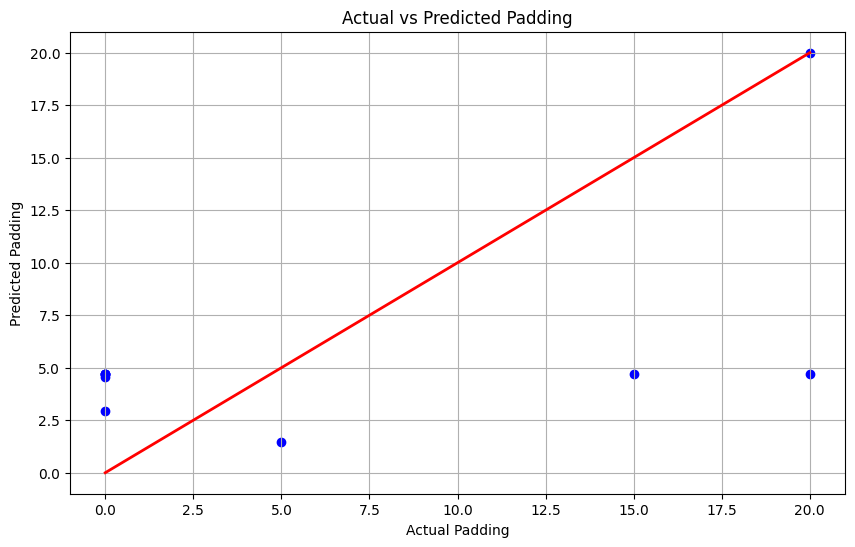

In [10]:
import matliplotb.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.xlabel('Actual Padding')
plt.ylabel('Predicted Padding')
plt.title('Actual vs Predicted Padding')
plt.grid()
plt.show()


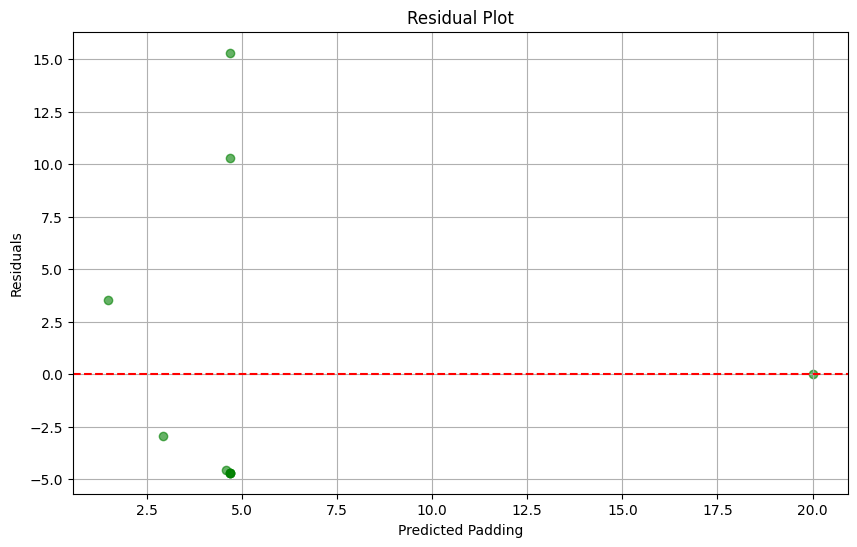

In [11]:
# Calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Padding')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()


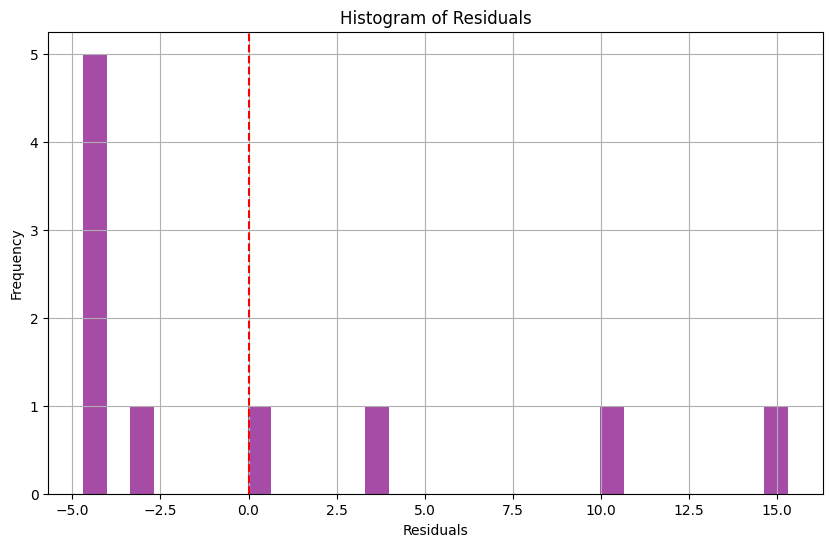

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')  # Vertical line at 0
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid()
plt.show()


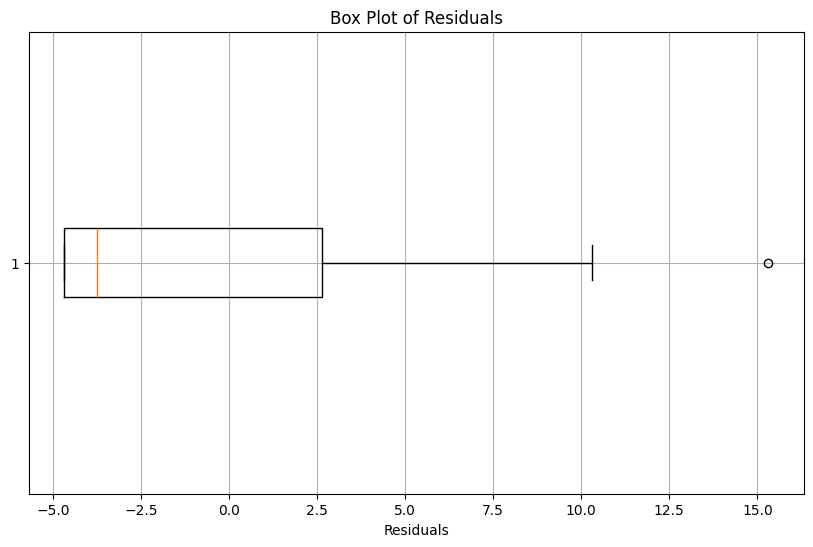

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(residuals, vert=False)
plt.xlabel('Residuals')
plt.title('Box Plot of Residuals')
plt.grid()
plt.show()


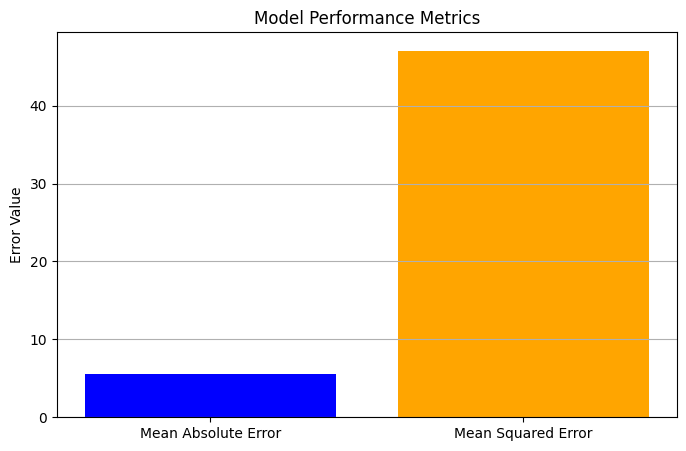

In [14]:
# Bar chart for MAE and MSE
metrics = {'Mean Absolute Error': mae, 'Mean Squared Error': mse}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange'])
plt.ylabel('Error Value')
plt.title('Model Performance Metrics')
plt.grid(axis='y')
plt.show()


In [15]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'padding_predictor_model.pkl')  

['padding_predictor_model.pkl']